In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## To find and manage outliers

In [2]:
url = 'http://bit.ly/drinksbycountry'

In [3]:
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [4]:
pd.read_table(url, sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [5]:
data = pd.read_csv(r"D:\Data\CSV\beer-servings.csv", index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [6]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

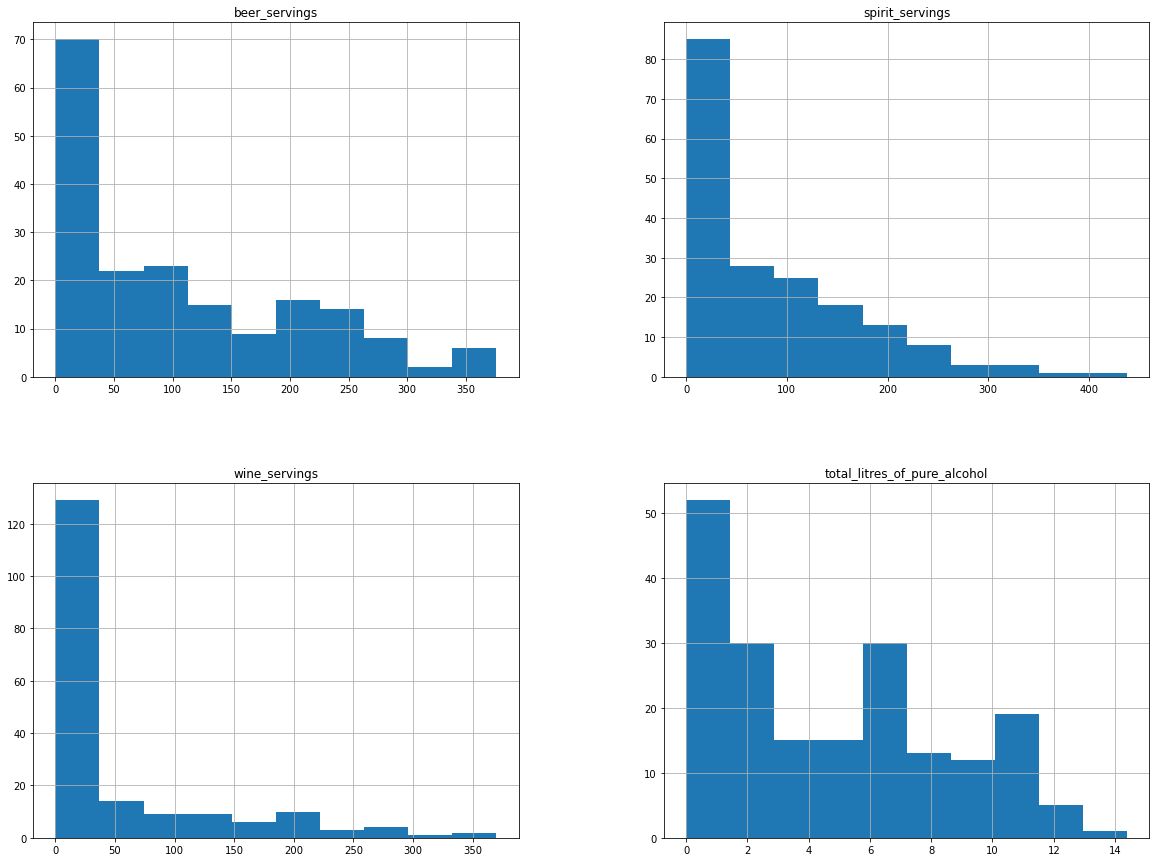

In [7]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [8]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [9]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median())

In [10]:
data['beer_servings'].isna().sum()

0

In [11]:
for i in [ 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']:
    data[i] = data[i].fillna(data[i].median())

In [12]:
data.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

## Managing Outliers

### Beer servings

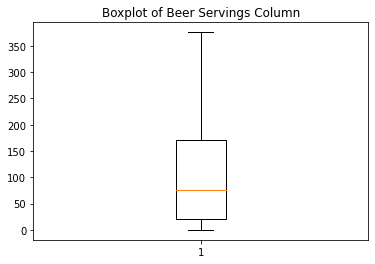

In [13]:
plt.boxplot(data['beer_servings'])
plt.title('Boxplot of Beer Servings Column');

In [14]:
Qb1 = np.percentile(data['beer_servings'], 25, interpolation='midpoint')
Qb2 = np.percentile(data['beer_servings'], 50, interpolation='midpoint')
Qb3 = np.percentile(data['beer_servings'], 75, interpolation='midpoint')

In [15]:
print(Qb1)
print(Qb2)
print(Qb3)

21.0
76.0
171.0


In [16]:
data['beer_servings'].median()

76.0

In [17]:
IQRb = Qb3 - Qb1
print(IQRb)

150.0


In [18]:
low_lim_b = Qb1 - 1.5*IQRb
up_lim_b = Qb3 + 1.5*IQRb
print(low_lim_b)
print(up_lim_b)

-204.0
396.0


In [19]:
outlier_b = []
for x in data['beer_servings']:
    if ((x>up_lim_b) or (x<low_lim_b)):
        outlier_b.append(x)
        

In [20]:
outlier_b

[]

#### That is No outliers for beer servings

### Spirit servings

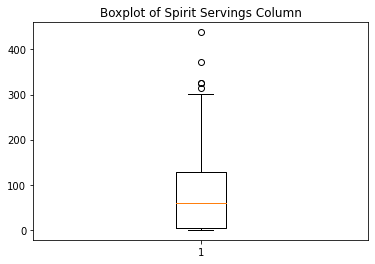

In [21]:
plt.boxplot(data['spirit_servings'])
plt.title('Boxplot of Spirit Servings Column');

In [22]:
Qs1 = np.percentile(data['spirit_servings'], 25, interpolation='midpoint')
Qs2 = np.percentile(data['spirit_servings'], 50, interpolation='midpoint')
Qs3 = np.percentile(data['spirit_servings'], 75, interpolation='midpoint')

In [23]:
print(Qs1)
print(Qs2)
print(Qs3)

5.0
60.0
128.0


In [24]:
data['spirit_servings'].median()

60.0

In [25]:
IQRs = Qs3 - Qs1
print(IQRs)

123.0


In [26]:
low_lim_s = Qs1 - 1.5*IQRs
up_lim_s = Qs3 + 1.5*IQRs
print(low_lim_s)
print(up_lim_s)

-179.5
312.5


In [27]:
outlier_s = []
for x in data['spirit_servings']:
    if ((x>up_lim_s) or (x<low_lim_s)):
        outlier_s.append(x)

In [28]:
outlier_s

[373.0, 438.0, 326.0, 326.0, 315.0]

#### There are outliers for spirit servings

### Wine Servings

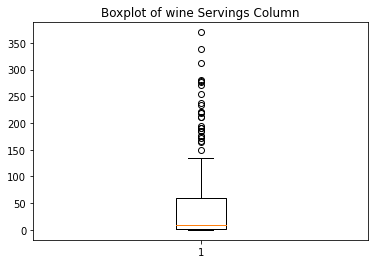

In [41]:
plt.boxplot(data['wine_servings'])
plt.title('Boxplot of wine Servings Column');

In [42]:
Qw1 = np.percentile(data['wine_servings'], 25, interpolation='midpoint')
Qw2 = np.percentile(data['wine_servings'], 50, interpolation='midpoint')
Qw3 = np.percentile(data['wine_servings'], 75, interpolation='midpoint')

In [43]:
print(Qw1)
print(Qw2)
print(Qw3)

1.0
9.0
59.0


In [38]:
data['wine_servings'].median()

9.0

In [39]:
IQRw = Qw3 - Qw1
print(IQRw)

58.0


In [40]:
low_lim_w = Qs1 - 1.5*IQRw
up_lim_w = Qs3 + 1.5*IQRw
print(low_lim_w)
print(up_lim_w)

-82.0
215.0


In [44]:
outlier_w = []
for x in data['spirit_servings']:
    if ((x>up_lim_w) or (x<low_lim_w)):
        outlier_w.append(x)

In [46]:
outlier_w

[373.0,
 252.0,
 254.0,
 286.0,
 438.0,
 302.0,
 326.0,
 246.0,
 216.0,
 244.0,
 226.0,
 326.0,
 315.0,
 221.0,
 293.0,
 258.0,
 237.0]

#### These are the outliers of wine servings

### Total litres of pure alcohol

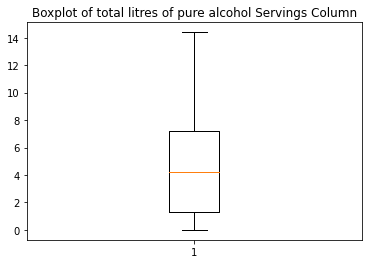

In [54]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('Boxplot of total litres of pure alcohol Servings Column');

In [47]:
Qt1 = np.percentile(data['total_litres_of_pure_alcohol'], 25, interpolation='midpoint')
Qt2 = np.percentile(data['total_litres_of_pure_alcohol'], 50, interpolation='midpoint')
Qt3 = np.percentile(data['total_litres_of_pure_alcohol'], 75, interpolation='midpoint')

In [48]:
print(Qt1)
print(Qt2)
print(Qt3)

1.3
4.25
7.2


In [49]:
data['total_litres_of_pure_alcohol'].median()

4.25

In [50]:
IQRt = Qt3 - Qt1
print(IQRt)

5.9


In [51]:
low_lim_t = Qs1 - 1.5*IQRt
up_lim_t = Qs3 + 1.5*IQRt
print(low_lim_t)
print(up_lim_t)

-3.8500000000000014
136.85


In [52]:
outlier_t = []
for x in data['total_litres_of_pure_alcohol']:
    if ((x>up_lim_t) or (x<low_lim_t)):
        outlier_t.append(x)

In [53]:
outlier_t

[]

#### There are no outliers in Total litres of pure alcohol